# <span style="color:teal;">CIS 211 Project 4:  Orbits</span>

##### Due 11:00 P.M. February 3, 2017

##### Reading:  M&R 10.6.3

###  <span style="color:teal">Vector and Body Classes</span>

This week's project will build on the Vector and Body classes from last week in order to create a complete simulation of the Solar System.  There are two ways to define these classes:  (1) copy your definitions from last week's project, or (2) download the instructor's solution from Canvas.

Instructions for both methods are in the next two sections.  **Use either of these methods, but not both.**  

Note: you will earn **extra credit points** if you use your own code.

####  <span style="color:teal">Option 1: &nbsp; Use Your Own Classes</span>

Choose this method only if your classes passed all the unit tests. Copy the complete Vector and Body class definitions from last week's notebook and paste them into the code cells below.  

In [ ]:
# Copy and paste a working version of the Vector class into this cell.

pass

In [ ]:
# Copy and paste a working version of the Body class into this cell.

pass

####  <span style="color:teal">Option 2: &nbsp; Download a (`.pyc`) File from Canvas </span>

If your classes did not pass all the unit tests you need to download a  "compiled Python" (`.pyc`) file from the Files section on Canvas.

The file you need has a name that ends with `cpython-3x.pyc` where `x` is either 4 (for Python 3.4) or 5 (for Python 3.5). To see which version of Python you have, select About from Jupyter's Help menu.
* it does not matter which OS you have, the `.pyc` files work for Mac, Windows, or Linux
* if you need the `.pyc` file for Python 3.6 send e-mail to `cis211-help`

Download one of the `Body.cpython-3x.pyc` files, rename it `Body.pyc`, and move it to the same folder as this notebook.  Then uncomment and execute the `import` command in the code cell below.

In [4]:
 from Body import *

###  <span style="color:teal">Libraries</span>

Execute the following code cell each time you open this notebook.

In [5]:
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

###  <span style="color:teal">Solar System</span>

Execute this code cell to create a list of Body objects for the sun and the 9 planets.  The positions and initial velocities are from a "snapshot" of the solar system from January 1, 1970.

**Do not change this cell.** &nbsp; The autograder will use these Body objects to test your simulation.

In [6]:
solar_system = [
    Body(1.9891E+30,  Vector(0,0,0), Vector(0,0,0)),
    Body(3.302E+23,   Vector(3.83713E+10,2.877025E+10,-1.175808E+09),    Vector(-38787.67,41093.05,6918.461)),
    Body(4.8685E+24,  Vector(-5.377313E+09,-1.085956E+11,-1.164748E+09), Vector(34741.48,-1865.747,-2031.506)),
    Body(5.9736E+24,  Vector(-2.700743E+10,1.446007E+11,9686451),        Vector(-29770.44,-5568.042,0.3961261)),
    Body(6.4185E+23,  Vector(1.983825E+11,7.422924E+10,-3.334841E+09),   Vector(-7557.626,24761.27,704.7457)),
    Body(1.89813E+27, Vector(-7.496502E+11,-3.201711E+11,1.811155E+10),  Vector(4982.522,-11417.83,-64.66531)),
    Body(5.68319E+26, Vector(1.082806E+12,8.510841E+11,-5.793461E+10),   Vector(-6487.118,7565.952,125.4422)),
    Body(8.68103E+25, Vector(-2.724616E+12,-2.894003E+11,3.428801E+10),  Vector(671.3469,-7099.093,-35.04028)),
    Body(1.0241E+26,  Vector(-2.328072E+12,-3.891086E+12,1.337436E+11),  Vector(4633.961,-2767.423,-49.57268)),
    Body(1.314E+22,   Vector(-4.551135E+12,3.175277E+11,1.282177E+12),   Vector(635.998,-5762.115,440.8821))
]

###  <span style="color:teal">Part 1: &nbsp; Draw Concentric Circles (25 points)</span>

Fill in the body of the function definition below so it draws a set of concentric circles.  Each circle will actually be a sequence of connected line segments drawn by a call to the `plot` function.  The parameters are:
* the number of circles to draw
* the diameter of the innermost circle
* the diameter of the outermost circle
* the number of line segments in each circle

Use the inner and outer diameters to compute euqally spaced diameters for the other circles.  For example, if the call is
```
>>> concentric(ncircles=5, inner=5, outer=9)
```
the function should draw circles with diameters 5, 6, 7, 8, and 9.

####  <span style="color:teal">Hint </span>

For a circle with radius $r$ the $(x,y)$ coordinates of the point at  angle $\alpha$ are $x = r \cos \alpha$ and $y = r \sin \alpha$.

![circle](http://pages.uoregon.edu/conery/CIS211/Orbits/circle.png)

The following expressions will create lists of $x$ and $y$ coordinates for $n$ equally spaced points around the perimeter of a circle with radius 1.

In [7]:
from math import pi as π, sin, cos

In [8]:
n = 6
x = [ cos(2*π*i/n) for i in range(n+1) ]
y = [ sin(2*π*i/n) for i in range(n+1) ]

**Note:** &nbsp; These lists have $n+1$ values so the last line segment "completes the circle" and connects back to the starting point.

##### <span style="color:red">Code:</span>

In [556]:
def concentric(ncircles=3, inner=1, outer=2, nsegs=30):
    step = (outer-inner)/(ncircles-1)
    for circle in list(range(1,ncircles+1)):
        if circle == 1:
            radius = inner
        else:
            radius += step
        print(circle, radius)
        n = nsegs
        x = [ radius*cos(2*π*i/n) for i in range(n+1) ]
        y = [ radius*sin(2*π*i/n) for i in range(n+1) ]
        for i in x:
            for j in y:
                plt.plot(x,y)
    pass

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

1 3
2 10.333333333333332
3 17.666666666666664
4 24.999999999999996


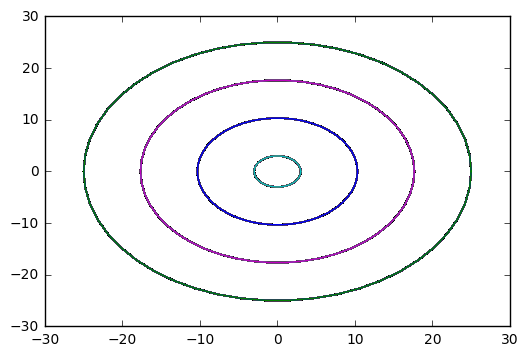

In [562]:
concentric(ncircles=4, inner=3, outer=25, nsegs=50)

##### <span style="color:red">Autograder Tests:</span>

The autograder cells use a different strategy for this part of the project.  The autograder will just make sure your function does not crash.  The human grader will look at the drawing to assign points for correctness.

1 2
2 6.0
3 10.0


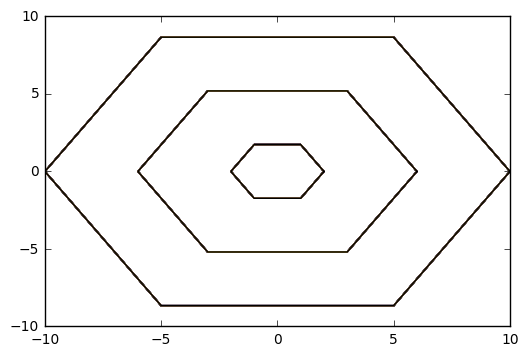

In [557]:
concentric(ncircles=3, inner=2, outer=10, nsegs=6)

1 1
2 1.25
3 1.5
4 1.75
5 2.0


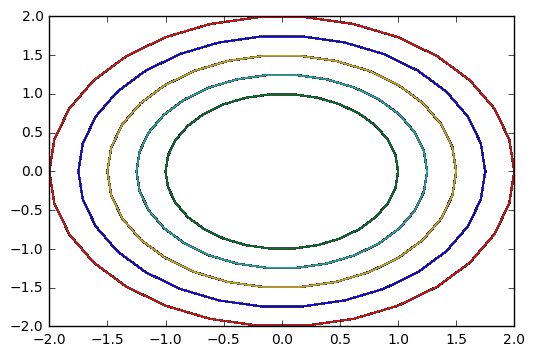

In [558]:
concentric(ncircles=5)

##### <span style="color:red">Documentation:</span>

I established a zone that i can make circles in, and from that zone i divide it by the number of circles-1 (for inner)
imagine the spaces between fence posts with the posts being the circles. So we add this gap to radius each time and it comes out to be pretty good.

###  <span style="color:teal">Part 2: &nbsp; Solar System (40 points)</span>

To run the full N-body simulation we need to calculate all pairwise interactions between the bodies.  On each time step, first update each body's force vector:
```
for i = 0 to n-1:
  for j = 0 to n-1:
    if i != j:
      add the force of body j to body i's force vector
```
Now uses the accumulated forces to move each body and clear the force vector so it's ready for the next time step:
```
for i = 0 to n-1:
   move body i
   clear forces on body i
```

Fill in the body of the function named `step_system`.  The arguments to this function are
* a list of Body objects
* a time step size (default 86459, the number of seconds in 1/365 of a year)
* the number of time steps to simulate (default 1)

The return value should be a list of orbits.  If there are $n$ bodies passed to the function, the output will be a list of $n$ sequences containing the $(x,y)$ coordinates of each body at each time step.

For example, to simulate one year of the solar system, using the list of Body object defined above:
```
orbits = step_system(solar_system, nsteps=365)
```
The output will be a list of 10 lists:
```
[ 
  [(sx0,sy0), (sx1,sy1), (sx2,sy2), ...],
  [(mx0,my0), (mx1,my1), (mx2,my2), ...],
  ...
  [(px0,py0), (px1,py1), (px2,py2), ...]
]
```
where `sx` and `sy` are the $x$ and $y$ coordinates of the first body (the Sun), `mx` and `my` are the coordinates of the second body (Mercury), _etc_.

**Note** &nbsp; Each time you call your `step_system` function it's going to change the position vectors in the Body objects.  To make sure you have a "clean copy" each time you test your code either go back and re-execute the cell that defines the solar system or make a copy of the solar system to use in your test:
```
ss = deepcopy(solar_system)
```

##### <span style="color:red">Code:</span>

In [549]:
def step_system(bodies, dt=86459, nsteps=1):
    res_list = []
    count = 0
    for i in range(0, len(bodies)):#10
        pair_list = []
        pair = ()
        for j in range(0, len(bodies)):#10*10
            if i != j:
                bodies[i].add_force(bodies[j])
        for l in range(0, nsteps):#10*nsteps
            pair = (bodies[i].position().x(), bodies[i].position().y())
            bodies[i].move(dt)
            bodies[i].clear_force
            pair_list.append(pair)
        res_list.append(pair_list)
    
    return(res_list)

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

In [528]:
ss = deepcopy(solar_system)
orbits = step_system(ss, nsteps=5, dt=86400)
print(orbits)
ss = deepcopy(solar_system)
start = deepcopy(ss[1].position())            # Mercury's starting position
step_system(ss, nsteps=1000, dt=7600.5216)
stop = ss[1].position()                       # Mercury's final position
print('{:.3g}'.format((stop-start).norm()))

[[(0, 0), (-1168.6243872524028, -493.3265464518315), (-3505.8731617572084, -1479.9796393554946), (-7011.746323514417, -2959.9592787109887), (-11686.243872524028, -4933.265464518315)], [(38371300000.0, 28770250000.0), (34675845507.439926, 32062613980.906662), (30636191210.319775, 35096902422.719986), (26252337108.63955, 37873115325.43997), (21524283202.399246, 40391252689.06662)], [(-5377313000.0, -108595600000.0), (-2371508006.954125, -108673141291.23076), (638438107.1376252, -108667023332.89229), (3652525342.27525, -108577246124.98457), (6670753698.45875, -108403809667.50763)], [(-27007430000.0, 144600700000.0), (-29571193754.879566, 144074628891.14212), (-32126555248.638702, 143503565502.22632), (-34673514481.277405, 142887509833.25262), (-37212071452.79568, 142226461884.22104)], [(198382500000.0, 74229240000.0), (197708853158.87372, 76360880410.27332), (197014538363.02118, 78484787502.81993), (196299555612.44235, 80600961277.63986), (195563904907.13727, 82709401734.73311)], [(-74965

##### <span style="color:red">Autograder Tests:</span>

Test 1:  Run the simulation for 5 time steps.  The return value should be a list of 10 orbits, and each orbit should have 5 pairs.

In [529]:
ss = deepcopy(solar_system)
orbits = step_system(ss, nsteps=5, dt=86400)

assert isinstance(orbits,list)
assert len(orbits) == 10
assert sum([len(x) for x in orbits]) == 50

Test 2:  Run the simulation long enough for Mercury to make one full orbit (about 88 Earth days), see if it's close to where it started.

In [530]:
ss = deepcopy(solar_system)
start = deepcopy(ss[1].position())            # Mercury's starting position
step_system(ss, nsteps=1000, dt=7600.5216)
stop = ss[1].position()                       # Mercury's final position

assert (stop-start).norm() < 1e10

AssertionError: 

##### <span style="color:red">Documentation:</span>

the only way i can store the coordinates to pass the structure test is to make a loop what i cannot properly reset and reinitialize the forces with each step

###  <span style="color:teal">Part 3: &nbsp; Plotting Orbits (35 points)</span>

Complete the definition of the `plot_orbits` function below.  The first four lines will run the simulation, using your `step_system` function, and figure out how many orbits to plot.  You need to fill in the rest:  extract the $x$ and $y$ coordinates from the list returned by `step_system` and plot the orbits.

##### <span style="color:red">Code:</span>

In [550]:
def plot_orbits(bodies, ndays = 365, nplanets=None):
    bodies = deepcopy(bodies)
    orbits = step_system(bodies, nsteps=ndays)
    if nplanets is None:
        nplanets = len(bodies)

    for circle in orbits:
        xl = []
        yl = []
        for point in circle:
            xl.append(point[0])
            yl.append(point[1])
        plt.plot(xl, yl)

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

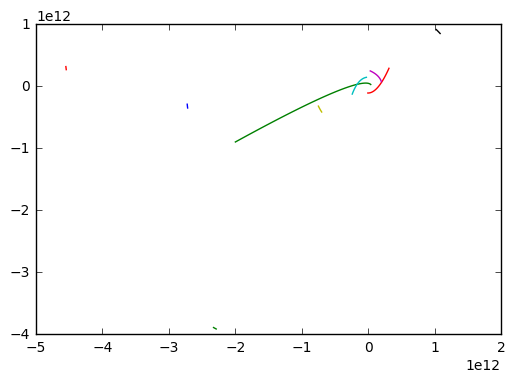

In [561]:
plot_orbits(solar_system,ndays=100, nplanets=5)

##### <span style="color:red">Autograder Tests:</span>

The autograder will call your `plot_orbits` function, the human grader will assign points based on the plot.

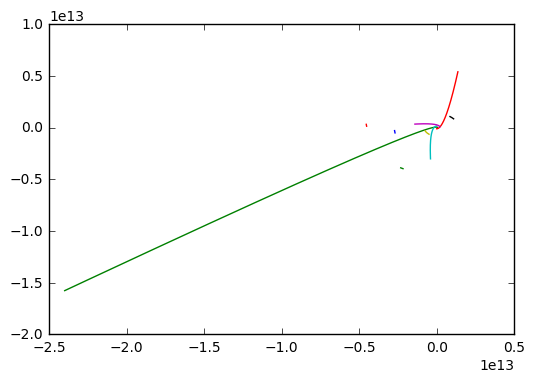

In [559]:
plot_orbits(solar_system, nplanets=5)

##### <span style="color:red">Documentation:</span>

Well, my sun is moving and i dont know how to change that. IN the previous part i could not find out how to store the coordinates the proper way and reset the forces at the same time and i know that its causing my planets to "fly away" but i can see that the planets are starting to orbit (through test) 